## Delicatessen Company
### Classification problem

Implementation of the Predictive Model project in Python.

The goal of this project is to support the marketing department of the organization Delicatessen and produce the highest profit for the next campaign. With this goal in mind, we created a predictive model in order to generate the highest theoretical profit using the information at our disposable. 
Initially, we have 30 predictors and 1 target variable (DepVar). The target variable is a binary variable which corresponds to whether the client accepts or not the marketing offer.
The training/test set contains 1450 entries and the dataset we want to predict contains 1855 rows.
We know beforehand that the response rate is 15%. The profit of accepting is 11 and the cost is 3 per client.

In [149]:
#import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [14]:
#set some options
pd.set_option('display.max_columns', 50)

In [168]:
#Import training set and test set.
file_train='Delicatessen_Train.xlsx'
file_score='Delicatessen_Score.xlsx'
xl_train=pd.ExcelFile(file_train)
train=xl_train.parse(0)
train=pd.DataFrame(train)
print(train)
print(train.describe())
print(train.info())
print(train.isnull().sum())
print(train.shape)

xl_score=pd.ExcelFile(file_score)
score_new=xl_score.parse(0)
score_new=pd.DataFrame(score)
print(score.shape)

          Custid  Year_Birth   Education Marital_Status  Income  Kidhome  \
0      202551983        1961  Graduation         Single   82332        0   
1      202552001        1980       Basic         Single   15807        1   
2      202552002        1956         PhD         Single   54998        0   
3      202552023        1976  Graduation        Married   28119        1   
4      202552049        1976         PhD        Married   16927        1   
5      202552097        1954      Master       Divorced   71997        0   
6      202552168        1986  Graduation       Together   84788        0   
7      202552233        1976      Master        Married   77022        1   
8      202552268        1959    2n Cycle         Single   81386        0   
9      202552279        1954      Master        Married   77350        0   
10     202552317        1971         PhD       Together   52032        0   
11     202552409        1976  Graduation        Married   65665        0   
12     20255

(1855, 31)


We can first inspect that there is not missing data in this dataset. We can also see that Z_CostContact contains only 3 and Z_Revenue only 11, so we can remove these variables.

In [16]:
#removing 2 features.
features=['Z_CostContact','Z_Revenue']
train=train.drop(features,axis=1)

#### Create new set of variables

* AcceptedCmpTotal=AcceptedCmp1+AcceptedCmp2+AcceptedCmp3+AcceptedCmp4+AcceptedCmp5

In [177]:
#AcceptedCmpTotal
train['AcceptedCmpTotal']=train['AcceptedCmp1']+train['AcceptedCmp2']+train['AcceptedCmp3']+train['AcceptedCmp4']+train['AcceptedCmp5']
print(train.head())
print(train.tail())
AcceptedCmp=['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']
train=train.drop(AcceptedCmp,axis=1)

      Custid   Education Marital_Status  Income  Kidhome  Teenhome  \
0  202551983  Graduation         Single   82332        0         0   
1  202552001       Basic         Single   15807        1         0   
2  202552002         PhD         Single   54998        0         1   
3  202552023  Graduation        Married   28119        1         0   
4  202552049         PhD        Married   16927        1         1   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-17       89       830         59              968               51   
1  2013-09-11        9         2         11                4                2   
2  2013-03-10        3       154         22              202               39   
3  2014-02-24       42        12          4               13               11   
4  2013-02-10       50        20          2               23                3   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                79

* Age=2018-Year_Birth 

In [176]:
train['Age']=2018-train['Year_Birth']
print(train.head())
train=train.drop('Year_Birth',axis=1)
print(train.head())

      Custid  Year_Birth   Education Marital_Status  Income  Kidhome  \
0  202551983        1961  Graduation         Single   82332        0   
1  202552001        1980       Basic         Single   15807        1   
2  202552002        1956         PhD         Single   54998        0   
3  202552023        1976  Graduation        Married   28119        1   
4  202552049        1976         PhD        Married   16927        1   

   Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0         0  2012-09-17       89       830         59              968   
1         0  2013-09-11        9         2         11                4   
2         1  2013-03-10        3       154         22              202   
3         0  2014-02-24       42        12          4               13   
4         1  2013-02-10       50        20          2               23   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0               51                79            1

* Dependent Home=Kidhome+Teenhome

In [175]:
train['Dependent_Home']=train['Kidhome']+train['Teenhome']
print(train.head())

      Custid  Year_Birth   Education Marital_Status  Income  Kidhome  \
0  202551983        1961  Graduation         Single   82332        0   
1  202552001        1980       Basic         Single   15807        1   
2  202552002        1956         PhD         Single   54998        0   
3  202552023        1976  Graduation        Married   28119        1   
4  202552049        1976         PhD        Married   16927        1   

   Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0         0  2012-09-17       89       830         59              968   
1         0  2013-09-11        9         2         11                4   
2         1  2013-03-10        3       154         22              202   
3         0  2014-02-24       42        12          4               13   
4         1  2013-02-10       50        20          2               23   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0               51                79            1

* MntTotal=MntWines+MntFruits+MntMeatProducts+MntFishProducts+MntSweetProducts+MntGoldProds

In [174]:
train['MntTotal']=train['MntWines']+train['MntFruits']+train['MntMeatProducts']+train['MntFishProducts']+train['MntSweetProducts']+train['MntGoldProds']

* NumPurchases=NumDealsPurchases+NumWebPurchases+NumCatalogPurchases+NumStorePurchases

In [108]:
train['NumPurchases']=train['NumDealsPurchases']+train['NumWebPurchases']+train['NumCatalogPurchases']+train['NumStorePurchases']

#### Correlation of variables

In [109]:
numeric=['Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
        'Relative0630', 'AcceptedCmpTotal', 'Age',
       'Dependent_Home', 'MntTotal','NumPurchases']
corr_pearson=(train[numeric].corr(method = 'pearson')) #linear correlation
corr_spearman=train[numeric].corr(method = 'spearman') #non-linear correlation

#positive correlation
print(corr_pearson[corr_pearson>0.5])
#negative correlation
print(corr_pearson[corr_pearson<-0.5])

print(corr_spearman[(corr_spearman>0.5)])
print(corr_spearman[corr_spearman<-0.5])


                       Income   Kidhome  Teenhome  Recency  MntWines  \
Income               1.000000       NaN       NaN      NaN  0.688639   
Kidhome                   NaN  1.000000       NaN      NaN       NaN   
Teenhome                  NaN       NaN  1.000000      NaN       NaN   
Recency                   NaN       NaN       NaN      1.0       NaN   
MntWines             0.688639       NaN       NaN      NaN  1.000000   
MntFruits            0.530505       NaN       NaN      NaN       NaN   
MntMeatProducts      0.689268       NaN       NaN      NaN  0.588391   
MntFishProducts      0.505229       NaN       NaN      NaN       NaN   
MntSweetProducts     0.526782       NaN       NaN      NaN       NaN   
MntGoldProds              NaN       NaN       NaN      NaN       NaN   
NumDealsPurchases         NaN       NaN       NaN      NaN       NaN   
NumWebPurchases      0.502536       NaN       NaN      NaN  0.572757   
NumCatalogPurchases  0.633846       NaN       NaN      NaN  0.61

There is 6 types of monetary products: Wines, Fruits, Meat, Fish, Sweet and Gold and the sum of all: Total. All of this information is highly correlated with Income, so people with more money tend to buy more products, specially wines and meat (both with correlation of >0.8).
* Total is highly correlated with Income, Wines, Meat, Fish, Sweet, Gold, NumCatalogPurchases, NumStorePurchases.
* Wines is highly correlated with Meat
In addition to that, those people do their shops preferently in catalog, store and web. So, in general people with more income, shop in general more. But there is no correlation with previous marketing campaign and number of deals. Differently from expected, there is not a correlation between income and gold products.

[422138, 39067, 245519, 52056, 39354, 63763]


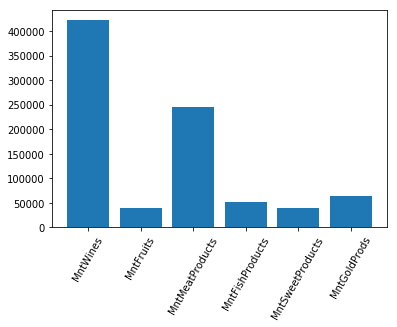

Graduation    737
PhD           292
Master        231
2n Cycle      151
Basic          39
Name: Education, dtype: int64


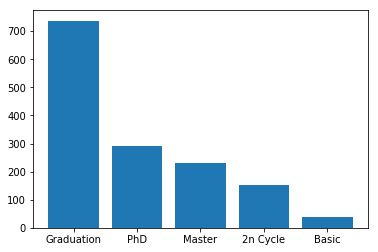

Graduation    737
PhD           292
Master        231
2n Cycle      151
Basic          39
Name: Education, dtype: int64
['Graduation', 'PhD', 'Master', '2n Cycle', 'Basic']


In [22]:
Mnt=['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']
Mnt_sum=[]
for element in Mnt:
    Mnt_sum.append(train[element].sum())
print(Mnt_sum)

Dict={'Monetary':Mnt_sum, 'label':Mnt}
plt.bar(Dict['label'],Dict['Monetary'])
plt.xticks(rotation=60) 
plt.show()

educ=train['Education'].value_counts()
print(educ)
label=['Graduation','PhD','Master','2n Cycle','Basic']
plt.bar(label,educ)
plt.show()
print(educ)
print(label)

#### Set variable Education as categorical and create dummy variables

In [23]:
train['Education']=train['Education'].astype('category')

print(train['Education'].dtypes)

score['Education']=score['Education'].astype('category')

train_dummies=pd.get_dummies(train['Education'],drop_first=True)
print(train_dummies)

category
      Basic  Graduation  Master  PhD
0         0           1       0    0
1         1           0       0    0
2         0           0       0    1
3         0           1       0    0
4         0           0       0    1
5         0           0       1    0
6         0           1       0    0
7         0           0       1    0
8         0           0       0    0
9         0           0       1    0
10        0           0       0    1
11        0           1       0    0
12        0           1       0    0
13        0           1       0    0
14        0           1       0    0
15        0           1       0    0
16        0           0       0    0
17        0           0       0    0
18        0           0       0    1
19        0           1       0    0
20        0           1       0    0
21        0           1       0    0
22        0           0       1    0
23        0           0       0    0
24        0           1       0    0
25        0           1      

#### Unique values 

Index(['Custid', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'DepVar', 'Relative0630', 'AcceptedCmpTotal', 'Age',
       'Dependent_Home', 'MntTotal', 'NumPurchases'],
      dtype='object')


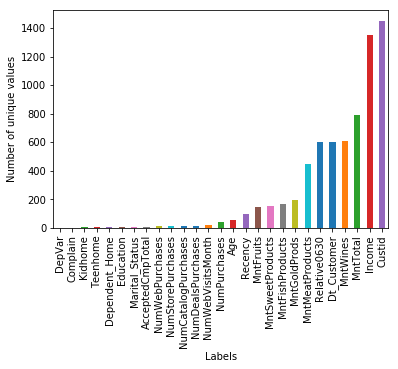

In [110]:
print(train.columns) #copy names
features=['Custid', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'DepVar', 'Relative0630', 'AcceptedCmpTotal', 'Age',
       'Dependent_Home', 'MntTotal','NumPurchases']
num_unique_labels = train[features].apply(pd.Series.nunique,axis=0).sort_values()

# Plot number of unique values for each label
num_unique_labels.plot( kind='bar')

# Label the axes
plt.xlabel('Labels')
plt.ylabel('Number of unique values')

# Display the plot
plt.show()

## Split into the Train and Test Set

For now, we will consider only the numeric variables.

In [163]:
X=train[numeric]
y=train['DepVar']
print(X.head())
print(X.shape)

   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0   82332        0         0       89       830         59              968   
1   15807        1         0        9         2         11                4   
2   54998        0         1        3       154         22              202   
3   28119        1         0       42        12          4               13   
4   16927        1         1       50        20          2               23   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0               51                79            19                  1   
1                2                 8            24                  2   
2               39                30             8                  5   
3               11                 0            14                  2   
4                3                 1             4                  5   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0    

Training set will has 1015 instances and validation set to test the performance of the model has 435 instances.

In [164]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y) 

0    862
1    153
Name: DepVar, dtype: int64


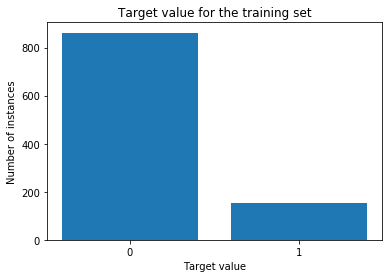

0.858128078817734
0.14187192118226602


In [123]:
balance=y_train.value_counts()
print(balance)
label=['0','1']
plt.bar(label,balance)
plt.title('Target value for the training set')
plt.xlabel('Target value')
plt.ylabel('Number of instances')
plt.show()
print(871/(871+144))
print(144/(871+144))

As we can see, there is a imbalanced class between 0 and 1 for the target value (~15% response rate)

### k-Nearest Neighbors

Simple and easy to understand algorithm that considers the closest neighbors to classify new instances (distance used here was the Euclidean distance)

* Model 1

In [119]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)

0.8183908045977012

* Model 2

Tunning n_neighbors parameter: 6

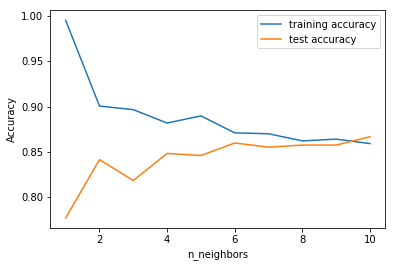

In [124]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy") 
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [116]:
clf = KNeighborsClassifier(n_neighbors=6)
clf.fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)

0.8597701149425288

### Decision tree

There is no need for variable transformation, robust to missing data and outliers. In addition to that, do not need feature selection, it does it automatically.
Tend to overfit, so it is important to cross validate our model.

In [125]:
# Setup the parameters and distributions to sample from: param_dist 
param_dist = {"max_depth": range(1,10), 
              "max_features": range(1, 22), #set the last number as the max of the input vars
              "min_samples_leaf": range(1, 21), #same
              "criterion": ["gini", "entropy"]} 
# Instantiate a Decision Tree classifier: tree 
tree = DecisionTreeClassifier() 
# Instantiate the RandomizedSearchCV object: tree_cv 
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5,random_state=6) 
# Fit it to the data 
tree_cv.fit(X_train,y_train) 
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_)) 

Tuned Decision Tree Parameters: {'min_samples_leaf': 5, 'max_features': 17, 'max_depth': 5, 'criterion': 'gini'}
Best score is 0.8729064039408867


Feature importances:
[0.02749862 0.         0.030064   0.15763888 0.         0.
 0.03573932 0.02859146 0.         0.08259119 0.01502509 0.
 0.         0.01696275 0.         0.11208233 0.4175777  0.0211477
 0.         0.05508095 0.        ]


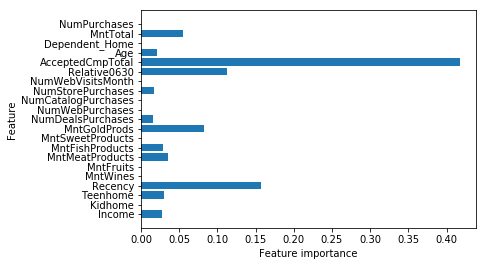

In [126]:
tree_best = DecisionTreeClassifier(min_samples_leaf=5,max_features=17,max_depth=5,criterion='gini') 
tree_best.fit(X_train,y_train) 
tree_best.score(X_test,y_test)

#Feature importance
print("Feature importances:\n{}".format(tree_best.feature_importances_))

#import graphviz
#with open("tree.dot") as f:
    #dot_graph = f.read()
#graphviz.Source(dot_graph)

def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
plot_feature_importances(tree_best)

Most important feature is the previous accepted Marketing campaigns, Recency, Relative0630, MntGoldProds followed by MntTotal.
6 most important features: Relative0630, AcceptedCmpTotal, MntTotal, Relative0630, Age, NumWebPurchases,Recency

### Random forest

There are two ways in which the trees in a random forest are randomized: by selecting the data points used to build a tree and by selecting the features in each split test. 

Accuracy on training set: 0.995
Accuracy on test set: 0.885


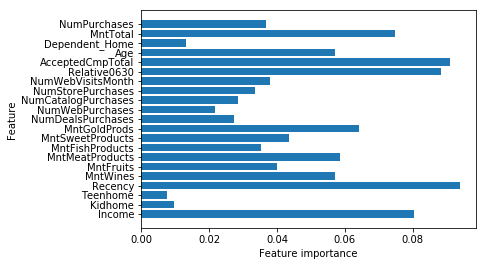

In [127]:
forest = RandomForestClassifier(n_estimators=100, random_state=2)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))
plot_feature_importances(forest) #without cv

In [128]:
# Setup the parameters and distributions to sample from: param_dist 
param_dist = {"n_estimators": range(1,200), 
              } 

forest = RandomForestClassifier(random_state=2)
forest_cv = RandomizedSearchCV(forest, param_dist, cv=5) 

forest_cv.fit(X_train, y_train)

# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(forest_cv.best_params_)) 
print("Best score is {}".format(forest_cv.best_score_)) 

Tuned Decision Tree Parameters: {'n_estimators': 123}
Best score is 0.8866995073891626


Accuracy on training set: 0.995
Accuracy on test set: 0.887


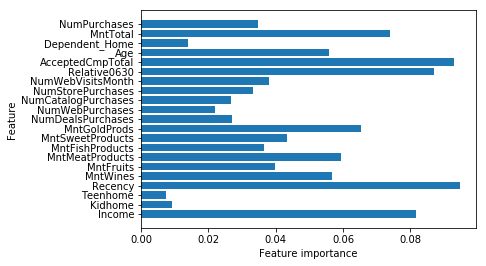

In [129]:
forest = RandomForestClassifier(n_estimators=123, random_state=2)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))
plot_feature_importances(forest)

9 most important features: AcceptedCmpTotal, Relative0630, Recency, MntTotal, Income, MntMeatProducts, MntWines, MntGoldProducts, Age

### Logistic Regression

I will remove the correlated variables that can cause colinearity.
I will also make a pipeline to standardize the variables.
9 Variables: AcceptedCmpTotal, Relative0630, Recency, Income (less correlated variables than MntTotal and equally important), Age, MntGoldProds, MntFishProducts, Dependent_Home, MntSweetProducts

In [178]:
subset=['AcceptedCmpTotal','Recency','Income','Age','MntGoldProds','MntFishProducts','Dependent_Home','MntSweetProducts']
X_subset=train[subset]
print (X_subset.shape)
y_subset=train['DepVar']

(1450, 8)


In [179]:
# Create training and test sets
steps = [('scaler', StandardScaler()), 
        ('logreg', LogisticRegression())] 
X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size = 0.3, random_state=42, stratify=y) 
pipeline=Pipeline(steps)
logreg=pipeline.fit(X_train,y_train)

print('Accuracy with Scaling: {}'.format(logreg.score(X_test,y_test))) 

Accuracy with Scaling: 0.8896551724137931


##### Hyperparameter tuning

In [180]:
#set pipeline

# Setup the hyperparameter grid 
c_space = np.logspace(-5, 8, 15) 
param_grid = {'C': c_space} 
# Instantiate a logistic regression classifier: logreg 
logreg_tuning = LogisticRegression() 
# Instantiate the GridSearchCV object: logreg_cv 
logreg_cv = GridSearchCV(logreg_tuning,param_grid, cv=5) 
# Fit it to the data 
logreg_cv.fit(X_train,y_train) 
# Print the tuned parameters and score 
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))  
print("Best score is {}".format(logreg_cv.best_score_)) 

Tuned Logistic Regression Parameters: {'C': 0.006105402296585327}
Best score is 0.8512315270935961


In [158]:
# Create training and test sets
steps = [('scaler', StandardScaler()), 
        ('logreg', LogisticRegression(C=31.622776601683793))] 
X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size = 0.3, random_state=42, stratify=y) 
pipeline=Pipeline(steps)
logreg=pipeline.fit(X_train,y_train)

print('Accuracy with Scaling: {}'.format(logreg.score(X_test,y_test))) 

# Predict the labels of the test set: y_pred 
y_pred = logreg.predict(X_test) 
# Compute and print the confusion matrix and classification report 
print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test, y_pred)) 

print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Accuracy with Scaling: 0.9011494252873563
[[363   7]
 [ 36  29]]
             precision    recall  f1-score   support

          0       0.91      0.98      0.94       370
          1       0.81      0.45      0.57        65

avg / total       0.89      0.90      0.89       435

Training set score: 0.885
Test set score: 0.901


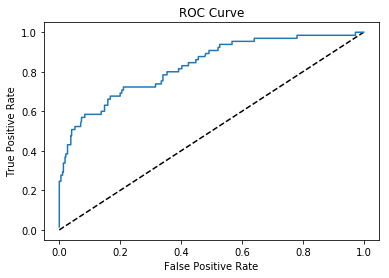

In [181]:
# Compute predicted probabilities: y_pred_prob 
y_pred_prob = logreg.predict_proba(X_test)[:,1] 
# Generate ROC curve values: fpr, tpr, thresholds 
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob) 
# Plot ROC curve 
plt.plot([0, 1], [0, 1], 'k--') 
plt.plot(fpr, tpr) 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve') 
plt.show()

In [160]:
# Compute predicted probabilities: y_pred_prob 
y_pred_prob = logreg.predict_proba(X_test)[:,1] 
# Compute and print AUC score 
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob))) 
# Compute cross-validated AUC scores: cv_auc 
cv_auc = cross_val_score(logreg,X, y,cv=5,scoring='roc_auc') 
# Print list of AUC scores 
print("AUC  scores  computed  using  5-fold  cross-validation:  {}".format(cv_auc)) 
print("Best score is {}".format(logreg_cv.best_score_)) 

AUC: 0.8814137214137214
AUC  scores  computed  using  5-fold  cross-validation:  [0.85783953 0.9048583  0.87075018 0.89780677 0.89133106]
Best score is 0.8660098522167488


### Predict the new entries using the Logistic Regression

In [186]:
score_new['AcceptedCmpTotal']=score_new['AcceptedCmp1']+score_new['AcceptedCmp2']+score_new['AcceptedCmp3']+score_new['AcceptedCmp4']+score_new['AcceptedCmp5']
score_new['Dependent_Home']=score_new['Kidhome']+score_new['Teenhome']
score_new['Age']=2018-score_new['Year_Birth']

subset=['AcceptedCmpTotal','Recency','Income','Age','MntGoldProds','MntFishProducts','Dependent_Home','MntSweetProducts']
score_new_subset=score_new[subset]
# Compute predicted probabilities: y_pred_prob 
y_pred_prob_new = logreg.predict_proba(score_new_subset)[:,1]
print(y_pred_prob_new)

[0.31430949 0.48831084 0.20195316 ... 0.83495645 0.71673066 0.06152864]


### Linear Support Vector Class

In [161]:
lsvc=LinearSVC()
lsvc.fit(X_train,y_train)
lsvc.predict(X_test)
print("Training set score: {:.3f}".format(lsvc.score(X_train, y_train)))
print("Test set score: {:.3f}".format(lsvc.score(X_test, y_test)))

Training set score: 0.849
Test set score: 0.851
